In [33]:
import pandas as pd , numpy as np , datetime , sqlite3


import seaborn as sns 
import matplotlib , matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) 

df = pd.read_csv(r"D:\Datasets\Call Center Data.csv", index_col =0 )
pd.set_option('display.max_rows',None)

In [34]:
# Cheking For Missing Data 
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{}-{}%'.format(col , missing_data))

Incoming Calls-0.0%
Answered Calls-0.0%
Answer Rate-0.0%
Abandoned Calls-0.0%
Answer Speed (AVG)-0.0%
Talk Duration (AVG)-0.0%
Waiting Time (AVG)-0.0%
Service Level (20 Seconds)-0.0%


In [35]:
# Cheking For Missing Data # 2nd way
for col in df.columns:
    missing_data = df[col].isnull()
    print(missing_data.value_counts())    

False    1251
Name: Incoming Calls, dtype: int64
False    1251
Name: Answered Calls, dtype: int64
False    1251
Name: Answer Rate, dtype: int64
False    1251
Name: Abandoned Calls, dtype: int64
False    1251
Name: Answer Speed (AVG), dtype: int64
False    1251
Name: Talk Duration (AVG), dtype: int64
False    1251
Name: Waiting Time (AVG), dtype: int64
False    1251
Name: Service Level (20 Seconds), dtype: int64


In [36]:
# Checking The Data Type
df.dtypes

Incoming Calls                 int64
Answered Calls                 int64
Answer Rate                   object
Abandoned Calls                int64
Answer Speed (AVG)            object
Talk Duration (AVG)           object
Waiting Time (AVG)            object
Service Level (20 Seconds)    object
dtype: object

In [37]:
# Checking If There Is Any Outliers In The Data 
df.describe().round()

,Incoming Calls,Answered Calls,Abandoned Calls
count,1251.0,1251.0,1251.0
mean,199.0,177.0,22.0
std,157.0,116.0,60.0
min,5.0,5.0,0.0
25%,123.0,114.0,3.0
50%,177.0,166.0,8.0
75%,233.0,214.0,16.0
max,1575.0,909.0,704.0


In [38]:
df.corr()

C:\Users\Ookmk\AppData\Local\Temp\ipykernel_7764\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Incoming Calls,Answered Calls,Abandoned Calls
Incoming Calls,1.000000,0.947889,0.786747
Answered Calls,0.947889,1.000000,0.549085
Abandoned Calls,0.786747,0.549085,1.000000


In [39]:
# Converting The Time Columns To Total Seconds 

df['Answer Speed (AVG)'] = pd.to_timedelta(df['Answer Speed (AVG)']).dt.total_seconds()
df['Talk Duration (AVG)'] = pd.to_timedelta(df['Talk Duration (AVG)']).dt.total_seconds()
df['Waiting Time (AVG)'] = pd.to_timedelta(df['Waiting Time (AVG)']).dt.total_seconds()

In [40]:
# Renaming The New Columns

df.rename(columns = {'Answer Speed (AVG)' : 'Answer Speed (AVG) Per Sec' ,
                     'Talk Duration (AVG)' : 'Talk Duration (AVG) Per Sec' ,
                     'Waiting Time (AVG)' : 'Waiting Time (AVG) Per Sec'} , inplace = True)

In [41]:
df.describe().round()

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG) Per Sec,Talk Duration (AVG) Per Sec,Waiting Time (AVG) Per Sec
count,1251.0,1251.0,1251.0,1251.0,1251.0,1251.0
mean,199.0,177.0,22.0,25.0,158.0,232.0
std,157.0,116.0,60.0,24.0,24.0,191.0
min,5.0,5.0,0.0,2.0,57.0,3.0
25%,123.0,114.0,3.0,13.0,142.0,118.0
50%,177.0,166.0,8.0,21.0,157.0,182.0
75%,233.0,214.0,16.0,30.0,171.0,276.0
max,1575.0,909.0,704.0,308.0,288.0,1551.0


C:\Users\Ookmk\AppData\Local\Temp\ipykernel_7764\2798799584.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix For Numerical Features')

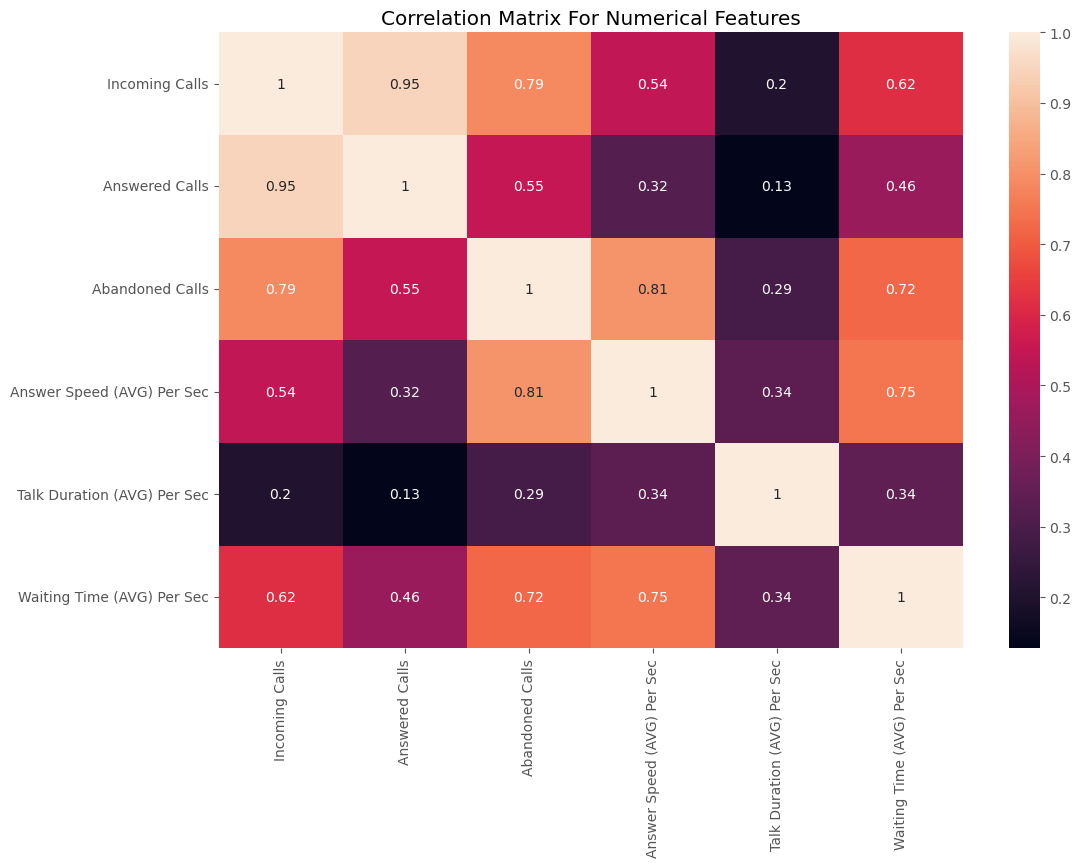

In [42]:
# Heat Map Showing The Correlation  

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation Matrix For Numerical Features')

<Axes: xlabel='Answered Calls', ylabel='Talk Duration (AVG) Per Sec'>

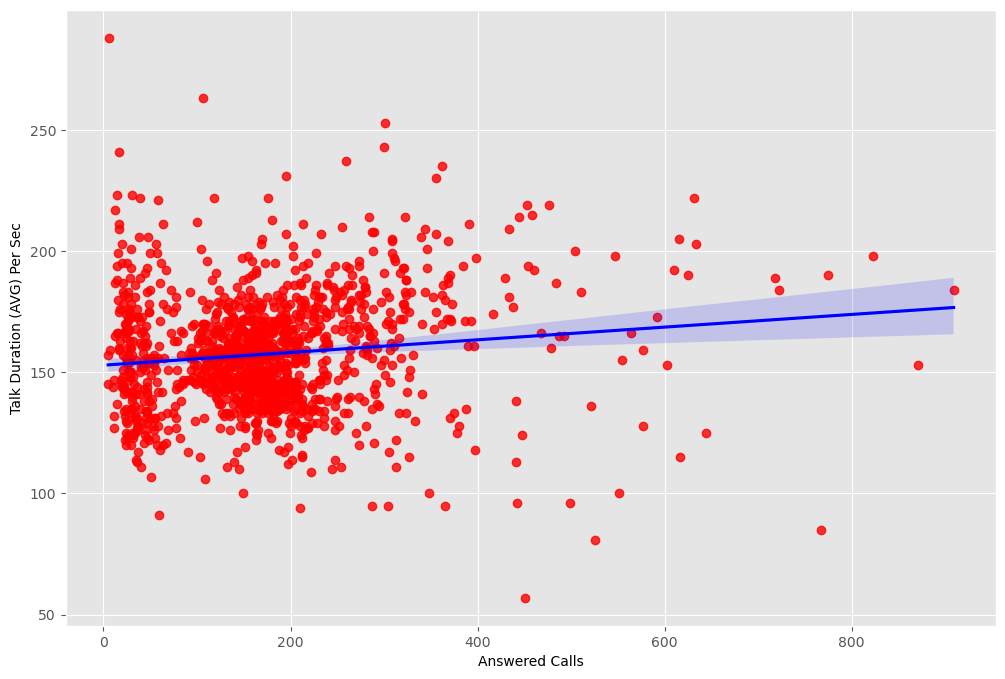

In [43]:
# plot Answered Calls vs Talk Duration (AVG) Per Sec using seaborn

sns.regplot(x = 'Answered Calls' , y = 'Talk Duration (AVG) Per Sec' , 
            data = df , scatter_kws = {'color':'red'} , line_kws={'color':'blue'})

# weak Correlation 

<Axes: xlabel='Answer Speed (AVG) Per Sec', ylabel='Abandoned Calls'>

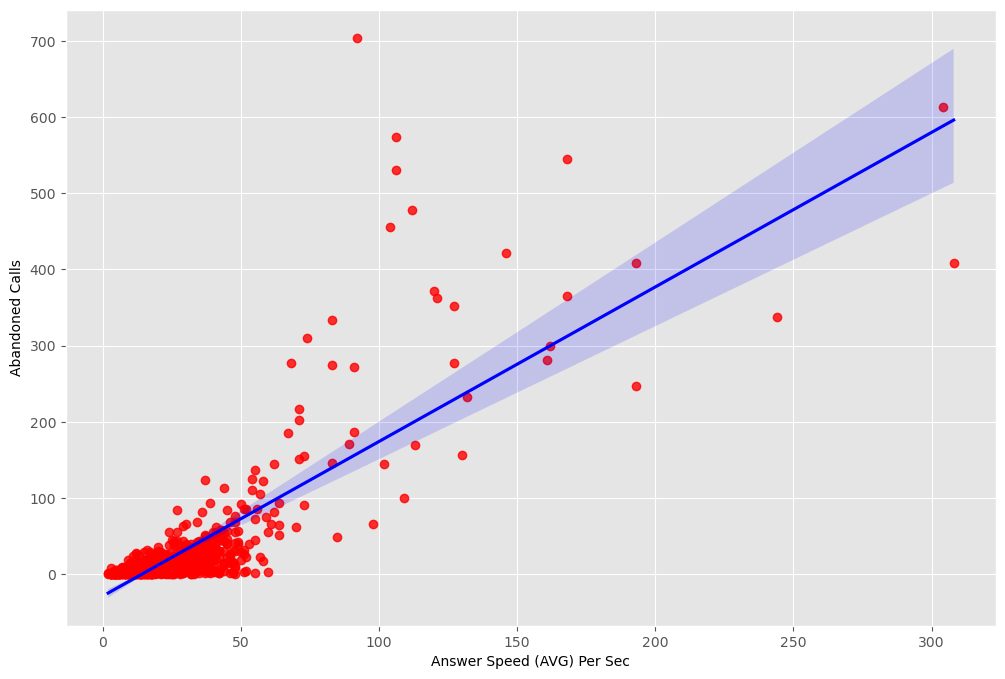

In [44]:
# plot Answer Speed (AVG) Per Sec vs Abandoned Calls Per Sec using seaborn


sns.regplot(x = 'Answer Speed (AVG) Per Sec' , y = 'Abandoned Calls' , 
            data = df , scatter_kws = {'color':'red'} , line_kws={'color':'blue'})

# Strong Correlation  

In [45]:
# Inserting SQLite Queries

con = sqlite3.connect('call_center.db')
cur = con.cursor()
cur.execute('DROP TABLE IF EXISTS call_center')
df.to_sql('call_center' , con , index = False)

1251

In [46]:
# Exploring The Data 
statment = 'select * from call_center'
cur.execute(statment)
output = cur.fetchall()
for row in output:
    print(row)

(217, 204, '94.01%', 13, 17.0, 134.0, 165.0, '76.28%')
(200, 182, '91.00%', 18, 20.0, 142.0, 415.0, '72.73%')
(216, 198, '91.67%', 18, 18.0, 158.0, 230.0, '74.30%')
(155, 145, '93.55%', 10, 15.0, 149.0, 192.0, '79.61%')
(37, 37, '100.00%', 0, 3.0, 126.0, 35.0, '97.30%')
(315, 304, '96.51%', 11, 18.0, 95.0, 157.0, '77.17%')
(252, 244, '96.83%', 8, 13.0, 110.0, 122.0, '82.00%')
(213, 205, '96.24%', 8, 10.0, 130.0, 202.0, '88.10%')
(219, 200, '91.32%', 19, 15.0, 138.0, 372.0, '79.45%')
(371, 348, '93.80%', 23, 19.0, 100.0, 209.0, '73.63%')
(166, 164, '98.80%', 2, 12.0, 130.0, 166.0, '81.33%')
(32, 32, '100.00%', 0, 2.0, 123.0, 3.0, '100.00%')
(231, 222, '96.10%', 9, 8.0, 109.0, 138.0, '86.46%')
(205, 197, '96.10%', 8, 7.0, 112.0, 168.0, '92.61%')
(338, 313, '92.60%', 25, 13.0, 111.0, 220.0, '80.06%')
(180, 174, '96.67%', 6, 13.0, 138.0, 206.0, '83.80%')
(226, 211, '93.36%', 15, 20.0, 124.0, 293.0, '76.23%')
(226, 212, '93.81%', 14, 10.0, 123.0, 165.0, '84.44%')
(45, 44, '97.78%', 1, 2.0, 

In [47]:
statment = '''select * from call_center'''
cur.execute(statment)
output = cur.fetchmany(5)
for row in output:
    print(row)

(217, 204, '94.01%', 13, 17.0, 134.0, 165.0, '76.28%')
(200, 182, '91.00%', 18, 20.0, 142.0, 415.0, '72.73%')
(216, 198, '91.67%', 18, 18.0, 158.0, 230.0, '74.30%')
(155, 145, '93.55%', 10, 15.0, 149.0, 192.0, '79.61%')
(37, 37, '100.00%', 0, 3.0, 126.0, 35.0, '97.30%')


In [48]:
statment = '''select "Service Level (20 Seconds)" from call_center'''
cur.execute(statment)
output = cur.fetchall()
print(output)

[('76.28%',), ('72.73%',), ('74.30%',), ('79.61%',), ('97.30%',), ('77.17%',), ('82.00%',), ('88.10%',), ('79.45%',), ('73.63%',), ('81.33%',), ('100.00%',), ('86.46%',), ('92.61%',), ('80.06%',), ('83.80%',), ('76.23%',), ('84.44%',), ('97.78%',), ('68.98%',), ('81.52%',), ('85.64%',), ('76.88%',), ('85.06%',), ('76.83%',), ('94.83%',), ('84.91%',), ('61.63%',), ('77.53%',), ('67.46%',), ('81.37%',), ('82.52%',), ('91.23%',), ('82.49%',), ('70.10%',), ('81.59%',), ('57.41%',), ('81.77%',), ('83.63%',), ('94.23%',), ('76.19%',), ('75.91%',), ('91.34%',), ('87.14%',), ('93.21%',), ('90.80%',), ('85.94%',), ('96.90%',), ('96.14%',), ('95.81%',), ('97.65%',), ('97.44%',), ('83.61%',), ('94.83%',), ('83.53%',), ('86.19%',), ('63.56%',), ('90.24%',), ('78.57%',), ('77.06%',), ('90.57%',), ('86.43%',), ('91.00%',), ('94.42%',), ('91.93%',), ('95.71%',), ('94.55%',), ('76.19%',), ('87.43%',), ('86.07%',), ('83.45%',), ('91.16%',), ('82.24%',), ('92.95%',), ('83.78%',), ('89.09%',), ('81.45%',